In [173]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

from sklearn.ensemble import RandomForestClassifier

In [52]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [6]:
df.SeniorCitizen.unique()

array([0, 1], dtype=int64)

In [7]:
df.tenure.unique()

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26,  0, 39], dtype=int64)

In [8]:
df.MultipleLines.unique()

array(['No phone service', 'No', 'Yes'], dtype=object)

In [53]:
raw = df

In [9]:
df.drop(['customerID' , 'MonthlyCharges','TotalCharges' , 'tenure'] , axis = 1 , inplace = True)

In [10]:
summary = pd.concat([pd.crosstab(df[x] , df.Churn) for x in df.columns[:-1]] , keys = df.columns[:-1])

In [11]:
summary

Churn                                         No   Yes
gender           Female                     2549   939
                 Male                       2625   930
SeniorCitizen    0                          4508  1393
                 1                           666   476
Partner          No                         2441  1200
                 Yes                        2733   669
Dependents       No                         3390  1543
                 Yes                        1784   326
PhoneService     No                          512   170
                 Yes                        4662  1699
MultipleLines    No                         2541   849
                 No phone service            512   170
                 Yes                        2121   850
InternetService  DSL                        1962   459
                 Fiber optic                1799  1297
                 No                         1413   113
OnlineSecurity   No                         2037  1461
                 No internet service        1413   113
                 Yes                        1724   295
OnlineBackup     No                         1855  1233
                 No internet service        1413   113
                 Yes                        1906   523
DeviceProtection No                         1884  1211
                 No internet service        1413   113
                 Yes                        1877   545
TechSupport      No                         2027  1446
                 No internet service        1413   113
                 Yes                        1734   310
StreamingTV      No                         1868   942
                 No internet service        1413   113
                 Yes                        1893   814
StreamingMovies  No                         1847   938
                 No internet service        1413   113
                 Yes                        1914   818
Contract         Month-to-month             2220  1655
                 One year                   1307   166
                 Two year                   1647    48
PaperlessBilling No                         2403   469
                 Yes                        2771  1400
PaymentMethod    Bank transfer (automatic)  1286   258
                 Credit card (automatic)    1290   232
                 Electronic check           1294  1071
                 Mailed check               1304   308

In [18]:
summary['Percentage'] = (summary['Yes'] / (summary['Yes'] +  summary['No'] ))*100

In [19]:
summary

Churn                                         No   Yes  Percentage
gender           Female                     2549   939   26.920872
                 Male                       2625   930   26.160338
SeniorCitizen    0                          4508  1393   23.606168
                 1                           666   476   41.681261
Partner          No                         2441  1200   32.957979
                 Yes                        2733   669   19.664903
Dependents       No                         3390  1543   31.279140
                 Yes                        1784   326   15.450237
PhoneService     No                          512   170   24.926686
                 Yes                        4662  1699   26.709637
MultipleLines    No                         2541   849   25.044248
                 No phone service            512   170   24.926686
                 Yes                        2121   850   28.609896
InternetService  DSL                        1962   459   18.959108
                 Fiber optic                1799  1297   41.892765
                 No                         1413   113    7.404980
OnlineSecurity   No                         2037  1461   41.766724
                 No internet service        1413   113    7.404980
                 Yes                        1724   295   14.611194
OnlineBackup     No                         1855  1233   39.928756
                 No internet service        1413   113    7.404980
                 Yes                        1906   523   21.531494
DeviceProtection No                         1884  1211   39.127625
                 No internet service        1413   113    7.404980
                 Yes                        1877   545   22.502064
TechSupport      No                         2027  1446   41.635474
                 No internet service        1413   113    7.404980
                 Yes                        1734   310   15.166341
StreamingTV      No                         1868   942   33.523132
                 No internet service        1413   113    7.404980
                 Yes                        1893   814   30.070188
StreamingMovies  No                         1847   938   33.680431
                 No internet service        1413   113    7.404980
                 Yes                        1914   818   29.941435
Contract         Month-to-month             2220  1655   42.709677
                 One year                   1307   166   11.269518
                 Two year                   1647    48    2.831858
PaperlessBilling No                         2403   469   16.330084
                 Yes                        2771  1400   33.565092
PaymentMethod    Bank transfer (automatic)  1286   258   16.709845
                 Credit card (automatic)    1290   232   15.243101
                 Electronic check           1294  1071   45.285412
                 Mailed check               1304   308   19.106700

In [31]:
labels = df['Churn'].value_counts(sort = True).index

In [29]:
labels


Index(['No', 'Yes'], dtype='object')

In [32]:
size = df['Churn'].value_counts(sort = True)

In [33]:
size

No     5174
Yes    1869
Name: Churn, dtype: int64

In [49]:
colors = ['blue' , 'red']
explode = [0.5 , 0]

rcParams['figure.figsize'] = 5,7

([<matplotlib.patches.Wedge at 0x1f741583e88>,
 [Text(-1.184660271771354, -1.0754441131396009, 'No'),
  Text(0.8144540060674139, 0.7393677515287918, 'Yes')],
 [Text(-0.8144539368428056, -0.7393678277834754, '73.5%'),
  Text(0.4442476396731348, 0.4032915008338864, '26.5%')])

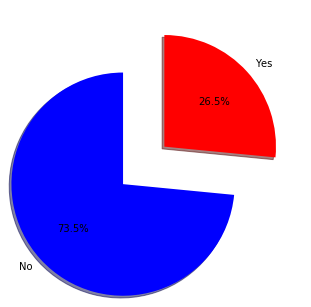

In [50]:
plt.pie(size , explode= explode , labels = labels , colors = colors , autopct ='%1.1f%%' ,shadow = True ,startangle =90 )

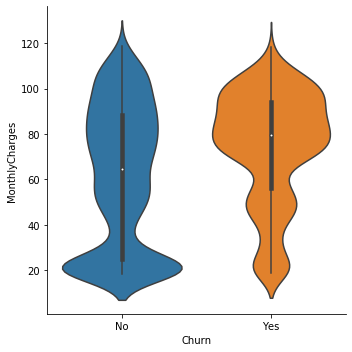

In [72]:
m = sns.factorplot(x='Churn',y ='MonthlyCharges' , data = raw, kind = 'violin'  )

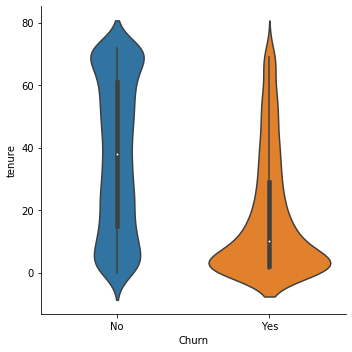

In [73]:
n = sns.factorplot(x='Churn',y ='tenure' , data = raw, kind = 'violin'  )

In [77]:
def plot_corr(df , size =10):
    corr = df.corr()
    fig ,ax = plt.subplots(figsize=(size,size))
    ax.legend()
    cax = ax.matshow(corr)
    fig.colorbar(cax)
    plt.xticks(range(len(corr.columns)) , corr.columns, rotation = 'vertical')
    plt.yticks(range(len(corr.columns)) , corr.columns)

No handles with labels found to put in legend.


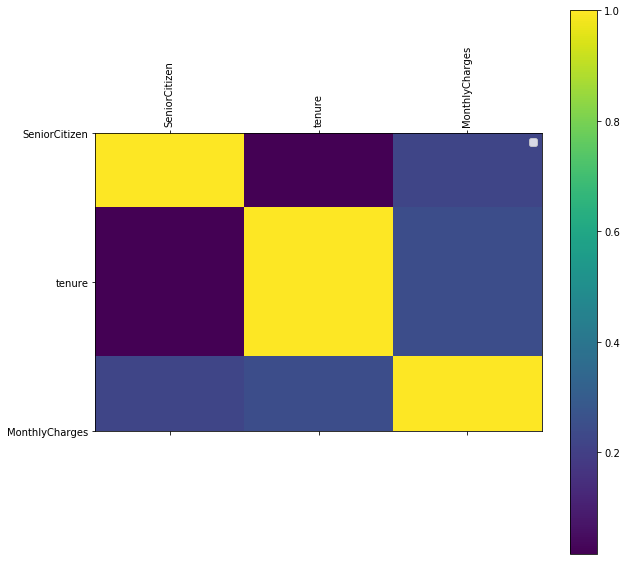

In [78]:
plot_corr(raw)

In [79]:
corr = df.corr()

In [80]:
corr

,SeniorCitizen,tenure,MonthlyCharges
SeniorCitizen,1.000000,0.016567,0.220173
tenure,0.016567,1.000000,0.247900
MonthlyCharges,0.220173,0.247900,1.000000


In [115]:
raw.drop(['customerID'] , axis =1 , inplace = True)

In [86]:
len(raw[raw['TotalCharges'] == " "])

11

In [87]:
raw = raw[raw['TotalCharges'] != " "]

In [88]:
len(raw[raw['TotalCharges'] == " "])

0

In [89]:
raw.nunique()

customerID          7032
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                72
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1584
TotalCharges        6530
Churn                  2
dtype: int64

In [90]:
Target = ['Churn']

In [98]:
# Categorical columns without Churn 
cat_col = raw.nunique()[raw.nunique () <5].keys().tolist()
cat_col =[ x for x in cat_col if x not in Target]

In [99]:
cat_col

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [119]:
num_col = raw.nunique()[raw.nunique () >5].keys().tolist()

In [121]:
num_col

['tenure', 'MonthlyCharges', 'TotalCharges']

In [100]:
#Binary value columns
binary_col = raw.nunique()[raw.nunique ()==2].keys().tolist()

In [101]:
binary_col

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'PaperlessBilling',
 'Churn']

In [102]:
#Multiple value columns
mul_col =[i for i in cat_col if i not in binary_col]

In [103]:
mul_col

['MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaymentMethod']

In [109]:
le = LabelEncoder()

In [110]:
for i in binary_col:
    raw[i] = le.fit_transform(raw[i])

C:\Users\Manish\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [116]:
raw

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,56.95,1889.5,0,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,1,53.85,108.15,1,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,1,70.70,151.65,1,...,1,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,84.80,1990.5,0,...,0,0,1,0,1,0,0,0,0,1
7039,0,0,1,1,72,1,1,103.20,7362.9,0,...,0,0,1,0,1,0,0,1,0,0
7040,0,0,1,1,11,0,1,29.60,346.45,0,...,1,0,0,1,0,0,0,0,1,0
7041,1,1,1,0,4,1,1,74.40,306.6,1,...,1,0,0,1,0,0,0,0,0,1


In [113]:
raw = pd.get_dummies(data = raw ,columns= mul_col )

In [117]:
raw.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,56.95,1889.5,0,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,1,53.85,108.15,1,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,1,70.70,151.65,1,...,1,0,0,1,0,0,0,0,1,0


In [118]:
raw.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'Churn', 'MultipleLines_No', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No',
       'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMetho

In [139]:
sc = StandardScaler()
scaled = sc.fit_transform(raw[num_col])

In [141]:
scaled = pd.DataFrame(scaled, columns = num_col )

In [142]:
scaled

,tenure,MonthlyCharges,TotalCharges
0,-1.280248,-1.161694,-0.994194
1,0.064303,-0.260878,-0.173740
2,-1.239504,-0.363923,-0.959649
3,0.512486,-0.747850,-0.195248
4,-1.239504,0.196178,-0.940457
...,...,...,...
7027,-0.343137,0.664868,-0.129180
7028,1.612573,1.276493,2.241056
7029,-0.872808,-1.170004,-0.854514
7030,-1.158016,0.319168,-0.872095


In [143]:
final = raw
final

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,56.95,1889.5,0,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,1,53.85,108.15,1,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,1,70.70,151.65,1,...,1,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,84.80,1990.5,0,...,0,0,1,0,1,0,0,0,0,1
7039,0,0,1,1,72,1,1,103.20,7362.9,0,...,0,0,1,0,1,0,0,1,0,0
7040,0,0,1,1,11,0,1,29.60,346.45,0,...,1,0,0,1,0,0,0,0,1,0
7041,1,1,1,0,4,1,1,74.40,306.6,1,...,1,0,0,1,0,0,0,0,0,1


In [144]:
final = final.drop(columns = num_col , axis =1)

In [145]:
final

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,0,1,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,1,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,1,1,1,1,0,0,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,0,0,0,0,1,0,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,1,1,1,1,0,0,...,1,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,1,1,0,0,0,1,...,0,0,1,0,1,0,0,0,0,1
7039,0,0,1,1,1,1,0,0,0,1,...,0,0,1,0,1,0,0,1,0,0
7040,0,0,1,1,0,1,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
7041,1,1,1,0,1,1,1,0,0,1,...,1,0,0,1,0,0,0,0,0,1


In [146]:
final = final.merge(scaled , left_index=True , right_index= True ,how = 'left')

In [147]:
final

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges
0,0,0,1,0,0,1,0,0,1,0,...,1,0,0,0,0,1,0,-1.280248,-1.161694,-0.994194
1,1,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,1,0.064303,-0.260878,-0.173740
2,1,0,0,0,1,1,1,1,0,0,...,1,0,0,0,0,0,1,-1.239504,-0.363923,-0.959649
3,1,0,0,0,0,0,0,0,1,0,...,0,1,0,1,0,0,0,0.512486,-0.747850,-0.195248
4,0,0,0,0,1,1,1,1,0,0,...,1,0,0,0,0,1,0,-1.239504,0.196178,-0.940457
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,1,1,0,0,0,1,...,0,1,0,0,0,0,1,NaN,NaN,NaN
7039,0,0,1,1,1,1,0,0,0,1,...,0,1,0,0,1,0,0,NaN,NaN,NaN
7040,0,0,1,1,0,1,0,0,1,0,...,1,0,0,0,0,1,0,NaN,NaN,NaN
7041,1,1,1,0,1,1,1,0,0,1,...,1,0,0,0,0,0,1,NaN,NaN,NaN


In [150]:
final.isnull().sum()

gender                                      0
SeniorCitizen                               0
Partner                                     0
Dependents                                  0
PhoneService                                0
PaperlessBilling                            0
Churn                                       0
MultipleLines_No                            0
MultipleLines_No phone service              0
MultipleLines_Yes                           0
InternetService_DSL                         0
InternetService_Fiber optic                 0
InternetService_No                          0
OnlineSecurity_No                           0
OnlineSecurity_No internet service          0
OnlineSecurity_Yes                          0
OnlineBackup_No                             0
OnlineBackup_No internet service            0
OnlineBackup_Yes                            0
DeviceProtection_No                         0
DeviceProtection_No internet service        0
DeviceProtection_Yes              

In [153]:
final.dropna(inplace = True)

In [154]:
final.isnull().sum()

gender                                     0
SeniorCitizen                              0
Partner                                    0
Dependents                                 0
PhoneService                               0
PaperlessBilling                           0
Churn                                      0
MultipleLines_No                           0
MultipleLines_No phone service             0
MultipleLines_Yes                          0
InternetService_DSL                        0
InternetService_Fiber optic                0
InternetService_No                         0
OnlineSecurity_No                          0
OnlineSecurity_No internet service         0
OnlineSecurity_Yes                         0
OnlineBackup_No                            0
OnlineBackup_No internet service           0
OnlineBackup_Yes                           0
DeviceProtection_No                        0
DeviceProtection_No internet service       0
DeviceProtection_Yes                       0
TechSuppor

In [169]:
X = final.drop(['Churn'] , axis = 1)
Y = final['Churn']

In [170]:
x_train , x_test , y_train , y_test = train_test_split(X,Y,train_size = 0.8)

In [171]:

x_train.shape , x_test.shape , y_train.shape , y_test.shape

((5616, 40), (1405, 40), (5616,), (1405,))

In [160]:
final_Train = pd.DataFrame(x_train)

In [161]:
final_Train.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges
568,0,0,0,0,1,1,0,0,1,0,...,1,0,0,0,0,1,0,-0.872808,-0.811007,-0.820918
6531,0,0,0,0,1,1,1,0,0,1,...,1,0,0,1,0,0,0,0.064303,-0.014899,-0.101584
6209,1,0,0,0,0,1,0,1,0,1,...,0,1,0,0,0,0,1,1.531085,-0.212679,0.807307
4224,0,0,1,0,1,0,1,0,0,0,...,0,0,1,0,0,0,1,1.571829,0.525259,1.511023
1520,0,0,1,0,1,1,1,0,0,0,...,1,0,0,0,0,0,1,-1.035784,-1.467506,-0.937237


In [172]:
type(x_train)

pandas.core.frame.DataFrame

In [174]:

model = LogisticRegression(solver='lbfgs')
model.fit(x_train , y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [176]:

predictions = model.predict(x_test)

In [177]:
print("Accuracy {0:.2f}%".format(100*accuracy_score(predictions,y_test)))

Accuracy 78.36%


In [178]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.83      0.88      0.86      1018
           1       0.63      0.53      0.57       387

    accuracy                           0.78      1405
   macro avg       0.73      0.70      0.71      1405
weighted avg       0.77      0.78      0.78      1405



In [179]:
coef = model.coef_[0]

In [181]:
coef = [abs(number) for number in coef]

In [182]:
coef

[0.04109298404665411,
 0.08362804765274125,
 0.2507992836438345,
 0.08930368541805163,
 0.1671082788337962,
 0.36025635815267376,
 0.08736721552563662,
 0.1670761323891325,
 0.07974106330805722,
 0.3654617553467378,
 0.44431396431980485,
 0.07888435541762245,
 0.2797543830317558,
 0.07888435541762245,
 0.20090217405875235,
 0.20625526061055105,
 0.07888435541762245,
 0.12740305163754148,
 0.13478672477619394,
 0.07888435541762245,
 0.05593451580321641,
 0.2287584930304881,
 0.07888435541762245,
 0.14990628405748455,
 0.06554411329728552,
 0.07888435541762245,
 0.14439632227029345,
 0.02911285020375869,
 0.07888435541762245,
 0.10796505917680034,
 1.164297542853213,
 0.06571343424267378,
 1.0986162550552758,
 0.15969362804101778,
 0.21832035483472817,
 0.3056199369460273,
 0.0723618994850873,
 0.08233066749450317,
 0.000650640805698884,
 0.021381225031997558]

In [185]:
cols = final.columns

In [187]:
cols = [x for x in cols if x != 'Churn']

In [188]:
cols

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'PaperlessBilling',
 'MultipleLines_No',
 'MultipleLines_No phone service',
 'MultipleLines_Yes',
 'InternetService_DSL',
 'InternetService_Fiber optic',
 'InternetService_No',
 'OnlineSecurity_No',
 'OnlineSecurity_No internet service',
 'OnlineSecurity_Yes',
 'OnlineBackup_No',
 'OnlineBackup_No internet service',
 'OnlineBackup_Yes',
 'DeviceProtection_No',
 'DeviceProtection_No internet service',
 'DeviceProtection_Yes',
 'TechSupport_No',
 'TechSupport_No internet service',
 'TechSupport_Yes',
 'StreamingTV_No',
 'StreamingTV_No internet service',
 'StreamingTV_Yes',
 'StreamingMovies_No',
 'StreamingMovies_No internet service',
 'StreamingMovies_Yes',
 'Contract_Month-to-month',
 'Contract_One year',
 'Contract_Two year',
 'PaymentMethod_Bank transfer (automatic)',
 'PaymentMethod_Credit card (automatic)',
 'PaymentMethod_Electronic check',
 'PaymentMethod_Mailed check',
 'tenure',
 'MonthlyCharges',
 'Tota

In [193]:
sorted_values = sorted(range(len(coef)) , key = lambda k: coef[k] , reverse = True)

In [194]:
 sorted_values

[30,
 32,
 10,
 9,
 5,
 35,
 12,
 2,
 21,
 34,
 15,
 14,
 4,
 7,
 33,
 23,
 26,
 18,
 17,
 29,
 3,
 6,
 1,
 37,
 8,
 11,
 13,
 16,
 19,
 22,
 25,
 28,
 36,
 31,
 24,
 20,
 0,
 27,
 39,
 38]

In [199]:
for i in sorted_values:
    print (cols[i])

Contract_Month-to-month
Contract_Two year
InternetService_Fiber optic
InternetService_DSL
PaperlessBilling
PaymentMethod_Electronic check
OnlineSecurity_No
Partner
TechSupport_No
PaymentMethod_Credit card (automatic)
OnlineBackup_No
OnlineSecurity_Yes
PhoneService
MultipleLines_No phone service
PaymentMethod_Bank transfer (automatic)
TechSupport_Yes
StreamingTV_Yes
DeviceProtection_No
OnlineBackup_Yes
StreamingMovies_Yes
Dependents
MultipleLines_No
SeniorCitizen
tenure
MultipleLines_Yes
InternetService_No
OnlineSecurity_No internet service
OnlineBackup_No internet service
DeviceProtection_No internet service
TechSupport_No internet service
StreamingTV_No internet service
StreamingMovies_No internet service
PaymentMethod_Mailed check
Contract_One year
StreamingTV_No
DeviceProtection_Yes
gender
StreamingMovies_No
TotalCharges
MonthlyCharges


In [200]:
model2 = RandomForestClassifier()
model2.fit(x_train , y_train)
predictions = model2.predict(x_test)

C:\Users\Manish\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [201]:
print("Accuracy {0:.2f}%".format(100*accuracy_score(predictions,y_test)))
print(classification_report(y_test,predictions))

Accuracy 75.16%
              precision    recall  f1-score   support

           0       0.79      0.89      0.84      1018
           1       0.57      0.39      0.47       387

    accuracy                           0.75      1405
   macro avg       0.68      0.64      0.65      1405
weighted avg       0.73      0.75      0.74      1405

